# Animals-10 Image Classification Project

In [2]:
%pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.5.4-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cac

Image Preprocessing & Augmentation

In [3]:
# ===============================
# READY-TO-RUN: Download Kaggle Dataset in Colab
# ===============================

# 1️⃣ Set your Kaggle credentials
kaggle_username = "KGAT_fcdb62bb6572f8348309b60da64ba8d8"  # Replace with your Kaggle username
kaggle_key = "KGAT_fcdb62bb6572f8348309b60da64ba8d8"     # Replace with your Kaggle API token

# 2️⃣ Set the dataset you want to download
# Format: "username/dataset-name" (as seen in Kaggle dataset URL)
dataset_path = "alessiocorrado99/animals10"  # Example, replace with your dataset

# ===============================
# 3️⃣ Install Kaggle library
%pip install -q kaggle

# ===============================
# 4️⃣ Create kaggle.json automatically
import json, os

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump({"username": kaggle_username, "key": kaggle_key}, f)

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

# ===============================
# 5️⃣ Download and unzip dataset
!kaggle datasets download -d {dataset_path} --unzip

# ===============================
# ✅ Done! List the downloaded files
!ls


Note: you may need to restart the kernel to use updated packages.


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0




  0%|          | 0.00/586M [00:00<?, ?B/s]
  0%|          | 1.00M/586M [00:00<09:35, 1.07MB/s]
  0%|          | 2.00M/586M [00:01<04:46, 2.13MB/s]
  1%|          | 3.00M/586M [00:01<03:20, 3.04MB/s]
  1%|          | 4.00M/586M [00:01<02:53, 3.52MB/s]
  1%|          | 5.00M/586M [00:01<02:36, 3.90MB/s]
  1%|          | 7.00M/586M [00:01<01:41, 5.98MB/s]
  1%|▏         | 8.00M/586M [00:02<01:57, 5.17MB/s]
  2%|▏         | 11.0M/586M [00:02<01:11, 8.45MB/s]
  2%|▏         | 13.0M/586M [00:02<01:08, 8.78MB/s]
  2%|▏         | 14.0M/586M [00:02<01:18, 7.66MB/s]
  3%|▎         | 16.0M/586M [00:02<01:03, 9.40MB/s]
  3%|▎         | 18.0M/586M [00:03<01:09, 8.54MB/s]
  3%|▎         | 20.0M/586M [00:03<01:01, 9.70MB/s]
  4%|▍         | 22.0M/586M [00:03<00:57, 10.2MB/s]
  4%|▍         | 24.0M/586M [00:03<01:11, 8.25MB/s]
  4%|▍         | 26.0M/586M [00:04<01:05, 8.96MB/s]
  5%|▍         | 27.0M/586M [00:04<01:05, 8.96MB/s]
  5%|▍         | 28.0M/586M [00:04<01:04, 9.01MB/s]
  5%|▌         | 30.

Animals-10.ipynb
flower.ipynb
iris_model.pkl
raw-img
scaler.pkl
translate.py


Import Required Libraries

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Paths

In [18]:
BASE_DIR = "animals-10"   # folder containing train/ and val/
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "val")

Image Preprocessing & Augmentation

In [36]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


Build Model (Transfer Learning)

In [20]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(len(train_data.class_indices), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

Compile Model

In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,588,490 (9.87 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# As training is done, save the model - no need to train again

from tensorflow.keras.models import load_model

model = load_model("animals10_model.h5")


Train Model

In [22]:
EPOCHS = 15
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.7748 - loss: 0.7391 - val_accuracy: 0.9347 - val_loss: 0.2332
Epoch 2/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 579s 884ms/step - accuracy: 0.8904 - loss: 0.3544 - val_accuracy: 0.9412 - val_loss: 0.2049
Epoch 3/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 584s 891ms/step - accuracy: 0.9046 - loss: 0.2985 - val_accuracy: 0.9439 - val_loss: 0.1870
Epoch 4/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 623s 950ms/step - accuracy: 0.9136 - loss: 0.2735 - val_accuracy: 0.9464 - val_loss: 0.1833
Epoch 5/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 588s 897ms/step - accuracy: 0.9177 - loss: 0.2518 - val_accuracy: 0.9454 - val_loss: 0.1824
Epoch 6/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 587s 896ms/step - accuracy: 0.9219 - loss: 0.2427 - val_accuracy: 0.9475 - val_loss: 0.1748
Epoch 7/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 595s 909ms/step - accuracy: 0.9255 - loss: 0.2316 - val_accuracy: 0.9489 - val_loss: 0.1744
Epoch 8/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 543s 830ms/step - accuracy: 0.9279 - lo

Accuracy vs Epochs Graph

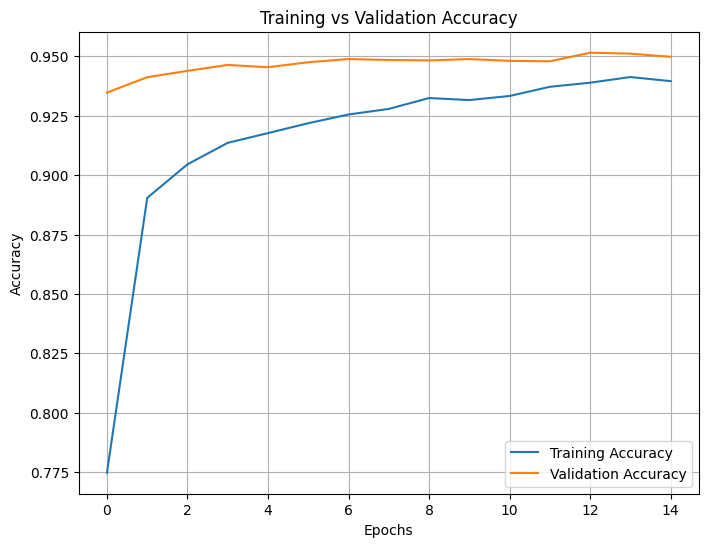

In [37]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8,6))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Loss vs Epochs Graph

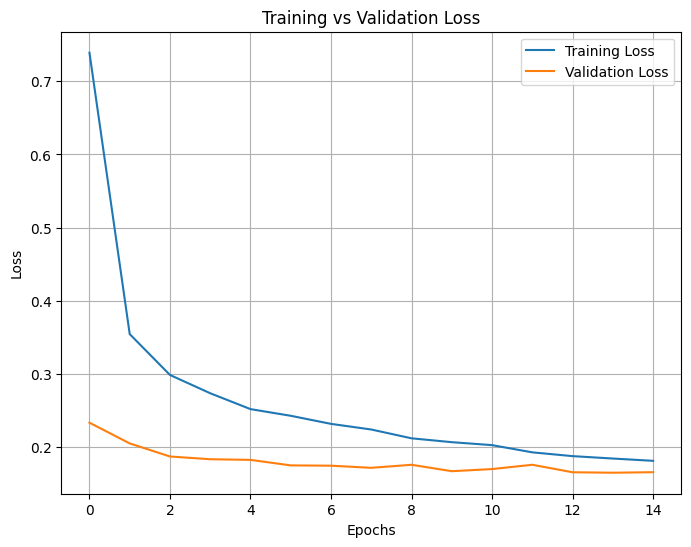

In [38]:
plt.figure(figsize=(8,6))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


Plot Accuracy & Loss

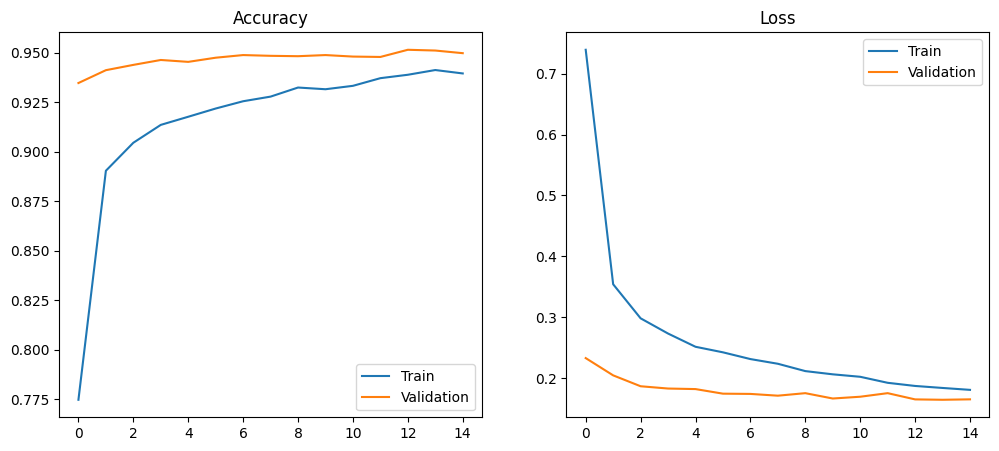

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.legend()

plt.show()

Confusion Matrix

164/164 ━━━━━━━━━━━━━━━━━━━━ 109s 652ms/step


<Figure size 1000x800 with 0 Axes>

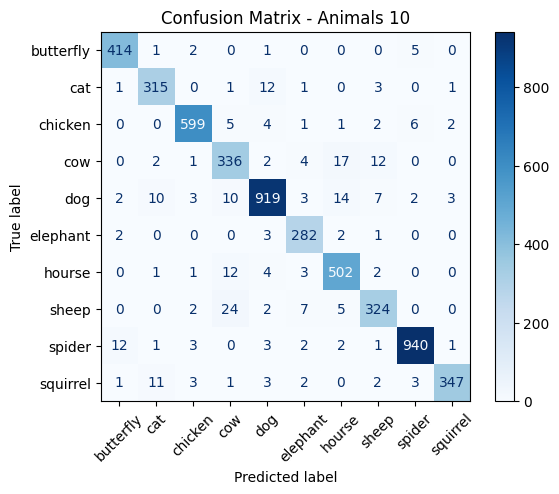

In [39]:
val_data.reset()
y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=val_data.class_indices.keys()
)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Animals 10")
plt.show()


Per-Class Accuracy Bar Graph

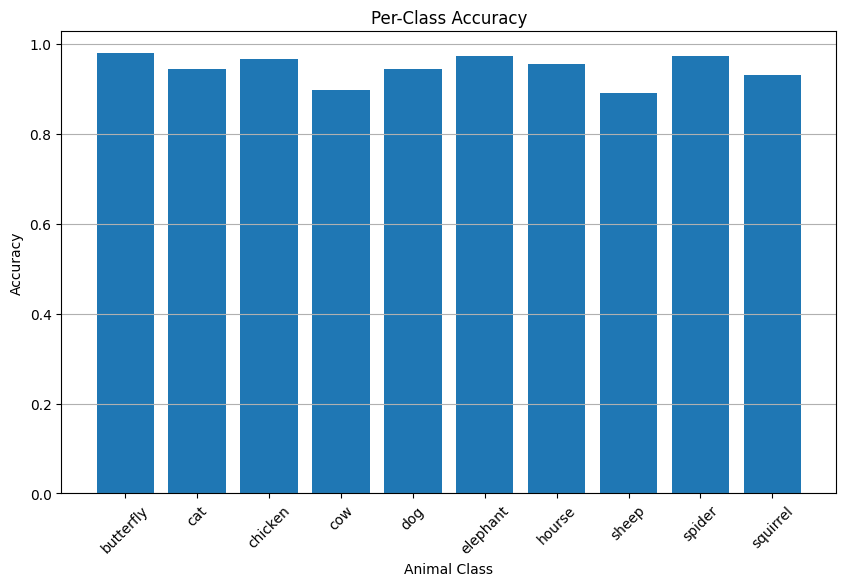

In [40]:
class_names = list(val_data.class_indices.keys())

class_accuracy = []
for i in range(len(class_names)):
    class_accuracy.append(cm[i, i] / cm[i].sum())

plt.figure(figsize=(10,6))
plt.bar(class_names, class_accuracy)
plt.xlabel("Animal Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Sample Predictions Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


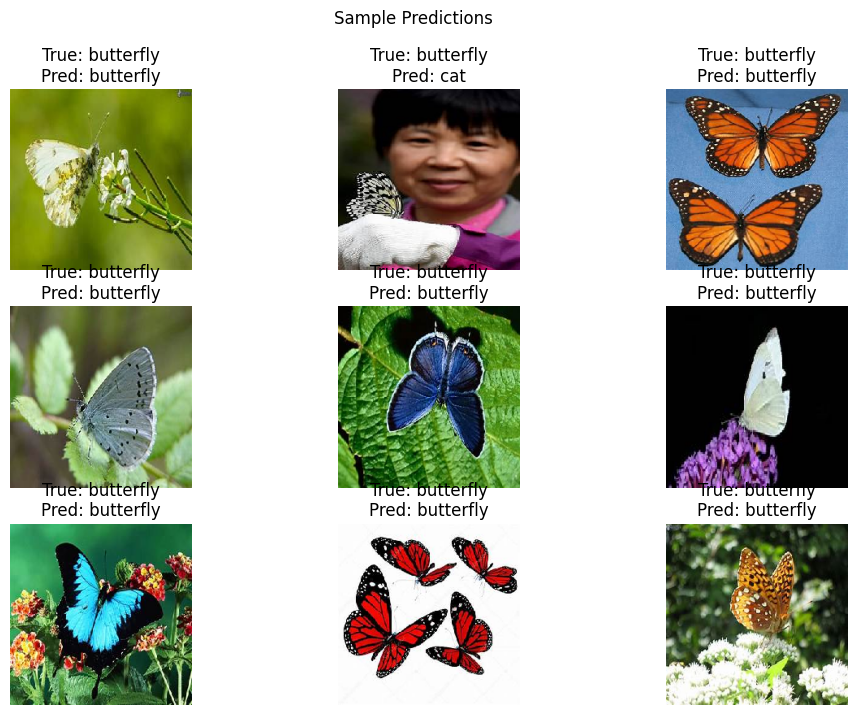

In [41]:
images, labels = next(val_data)
predictions = model.predict(images)

true_classes = np.argmax(labels, axis=1)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(12,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[pred_classes[i]]}")
    plt.axis("off")

plt.suptitle("Sample Predictions")
plt.show()


Test on a New Image

In [24]:
# Buterfly

from tensorflow.keras.preprocessing import image

# Replace with path to your test image
img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image1.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Animal: butterfly


In [25]:
# Cat

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image2.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Animal: cat


In [26]:
# chicken

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image3.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Animal: chicken


In [27]:
# Cow

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image4.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Animal: cow


In [28]:
# Dog

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Animal: dog


In [29]:
# Elephant

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image5.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Animal: elephant


In [30]:
# Hourse

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image6.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Animal: hourse


In [31]:
# Sheep

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image7.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Animal: sheep


In [32]:
# Spider

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image8.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Animal: spider


In [33]:
# Squirrel

img_path = "D:\\Matchine_Learning\\CampusX\\tutorial\\AI_project\\animals-10\\image9.png"  

if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())

    print("Predicted Animal:", class_names[np.argmax(pred)])
else:
    print("Test image not found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Animal: squirrel


Save Model

In [34]:
model.save("animals10_model.h5")
print("Model saved as animals10_model.h5")

Model saved as animals10_model.h5


Save Model Architecture Diagram

In [43]:
%pip install pydot

  Using cached pydot-4.0.1-py3-none-any.whl.metadata (11 kB)
Using cached pydot-4.0.1-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
plot_model(
    model,
    to_file="animals10_model_architecture.png",
    show_shapes=True,
    show_layer_names=True
)
print("✅ Model architecture saved")


You must install pydot (`pip install pydot`) for `plot_model` to work.
✅ Model architecture saved


In [48]:
import tensorflow as tf

# Load old model safely
model = tf.keras.models.load_model("animals10_model.h5", compile=False)

# Export to TensorFlow SavedModel format (Render-friendly)
model.export("animals10_model_tf")


INFO:tensorflow:Assets written to: animals10_model_tf\assets


INFO:tensorflow:Assets written to: animals10_model_tf\assets


Saved artifact at 'animals10_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2367029637968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029638736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029638544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029638928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029637776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029638160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029639696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029639504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029639888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029635088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029639120: TensorSpec(shap

In [49]:
model.save("animals10_model.keras")


In [50]:
import tensorflow as tf

# Load old model
model = tf.keras.models.load_model(
    "animals10_model.h5",
    compile=False
)

# ✅ Correct Keras 3 export
model.export("animals10_model_export")


INFO:tensorflow:Assets written to: animals10_model_export\assets


INFO:tensorflow:Assets written to: animals10_model_export\assets


Saved artifact at 'animals10_model_export'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2367029635664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029636432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029633936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029634704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029636240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029636048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366954206992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366954206416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2367029636624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366954196816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366954196432: TensorSpec(